%matplotlib inline


# Linear Regression Example

This example uses the only the first feature of the `diabetes` dataset, in
order to illustrate a two-dimensional plot of this regression technique. The
straight line can be seen in the plot, showing how linear regression attempts
to draw a straight line that will best minimize the residual sum of squares
between the observed responses in the dataset, and the responses predicted by
the linear approximation.

The coefficients, the residual sum of squares and the variance score are also
calculated.



Automatically created module for IPython interactive environment


('Coefficients: \n', array([ 938.23786125]))
('Intercept: \n', 152.91886182616167)
Mean squared error: 2548.07


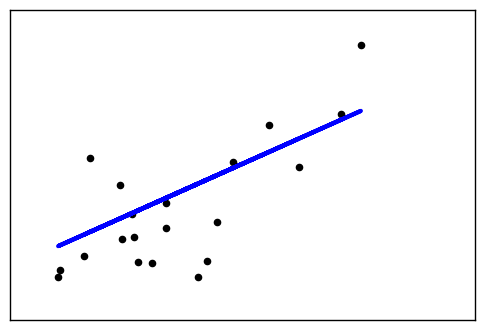

In [1]:
print(__doc__)

# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The intercept
print('Intercept: \n', regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [2]:
regr.coef_

array([ 938.23786125])

In [3]:
regr.score(diabetes_X_test, diabetes_y_test)

0.47257544798227136

1. Implemente o coeficiente de determinação e verifique o score obtido

In [4]:
def total_sum_of_squares(y):
    mean_y = np.mean(y)
    return sum((v-mean_y)**2 for v in y)

In [5]:
def r_squared(y,yb):
    #y = valor real; yb = valor real
    return 1.0 - sum((y-yb)**2)/total_sum_of_squares(y)

In [6]:
yb = regr.predict(diabetes_X_test)
print r_squared(diabetes_y_test,yb)
#usamos a função score do scikit-learn para verificar se não há erros
print regr.score(diabetes_X_test,diabetes_y_test)

0.472575447982
0.472575447982


2. Execute o notebook usando agora o dataset aerogerador na pasta do github.

('Coefficients: \n', [array([ 56.74501148]), -220.42875921926662])
Mean squared error: 897.12
R-squared: 0.92


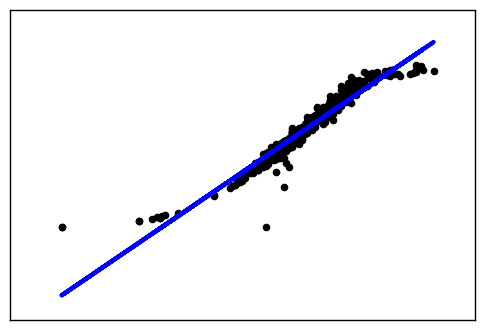

In [7]:
data = np.loadtxt("aerogerador.txt",delimiter=",")
#vamos embaralhar os dados antes de dividir treino e teste
rdata = np.random.permutation(data)
X = rdata[:,0]
y = rdata[:,1]

nt = int(len(X) * 0.8)
X_train = X[:nt]
X_test = X[nt:]
y_train = y[:nt]
y_test = y[nt:]
#quando o o dataset possui apenas 1 feature, precisamos usar reshape para
#evitar warnings (ou futuros erros) no scikit-learn
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', [regr.coef_ , regr.intercept_])
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
print ("R-squared: %.2f" % r_squared(regr.predict(X_test),y_test))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, regr.predict(X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()